In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,models,layers
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min
from sklearn.cluster import AgglomerativeClustering

data = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = data.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

num_images = 50000

# ####
train_images = train_images[:num_images]
train_labels = train_labels[:num_images]
# ####

subset_num = int(0.8*num_images)

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

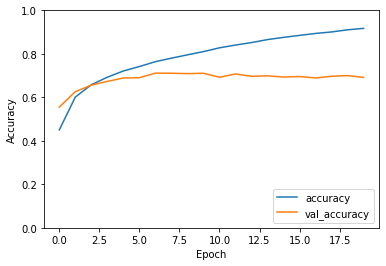

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [ ]:
train_acc_wo_augmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_wo_augmeent

79/79 [==============================] - 3s 41ms/step - loss: 1.4625 - accuracy: 0.6917


[1.4624733924865723, 0.6916999816894531]

In [ ]:
indices_agg = np.load('indices_agg_all.npy')
indices_craig = np.load('indices_craig_all.npy')

In [ ]:
train_images_craig = train_images[indices_craig]
train_labels_craig = train_labels[indices_craig]

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images_craig, train_labels_craig, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

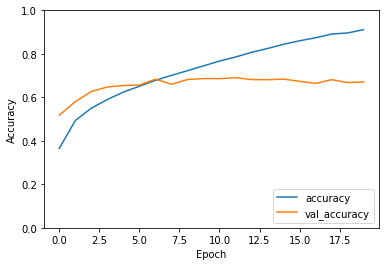

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [ ]:
train_acc_craig_wo_augmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_craig_wo_augmeent

79/79 [==============================] - 3s 42ms/step - loss: 1.6093 - accuracy: 0.6709


[1.6093486547470093, 0.6708999872207642]

In [ ]:
train_images_agg = train_images[indices_agg]
train_labels_agg = train_labels[indices_agg]

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images_agg, train_labels_agg, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

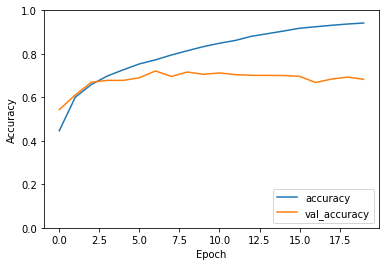

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [ ]:
train_acc_agg_wo_augmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_agg_wo_augmeent

79/79 [==============================] - 3s 42ms/step - loss: 1.6669 - accuracy: 0.6828


[1.6669132709503174, 0.6827999949455261]

In [ ]:
common_indices = np.intersect1d(indices_agg, indices_craig) 
# Common elements
print(len(common_indices)/len(indices_craig)*100)

78.4225


In [ ]:
num_augmented = 20000
train_images_augment = np.zeros((num_augmented, 32, 32, 3))
train_labels_augment = np.zeros((num_augmented, 1))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
    
datagen.fit(train_images)

k = 0
for X_batch, y_batch in datagen.flow(train_images, train_labels, batch_size=10, seed=499):
  for i in range(0, 10):
      train_images_augment[k] = X_batch[i]
      train_labels_augment[k] = y_batch[i]
      k += 1
      if k >= num_augmented:
          break

  if k >= num_augmented:
          break  

In [ ]:
augmented_dataset = np.append(train_images, train_images_augment, axis=0)
augmented_labels = np.append(train_labels, train_labels_augment, axis=0)

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(augmented_dataset, augmented_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

In [ ]:
train_acc_w_augmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_w_augmeent

79/79 [==============================] - 3s 43ms/step - loss: 1.3675 - accuracy: 0.7005


[1.367521047592163, 0.7005000114440918]

In [ ]:
agg_subset = train_images[indices_agg, :]
agg_labels = train_labels[indices_agg]

In [ ]:
num_augmented = 20000
agg_images_augment = np.zeros((num_augmented, 32, 32, 3))
agg_labels_augment = np.zeros((num_augmented, 1))

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(agg_subset)

k = 0
for X_batch, y_batch in datagen.flow(agg_subset, agg_labels, batch_size=10, seed=499):
  for i in range(0, 10):
      agg_images_augment[k] = X_batch[i]
      agg_labels_augment[k] = y_batch[i]
      k += 1
      if k >= num_augmented:
          break

  if k >= num_augmented:
          break  

In [ ]:
augmented_dataset = np.append(train_images, agg_images_augment, axis=0)
augmented_labels = np.append(train_labels, agg_labels_augment, axis=0)

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(augmented_dataset, augmented_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

In [ ]:
train_acc_w_aaugmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_w_aaugmeent

79/79 [==============================] - 3s 42ms/step - loss: 1.2697 - accuracy: 0.7064


[1.2696806192398071, 0.7063999772071838]

In [ ]:
craig_subset = train_images[indices_craig, :]
craig_labels = train_labels[indices_craig]

In [ ]:
num_augmented = 20000
craig_images_augment = np.zeros((num_augmented, 32, 32, 3))
craig_labels_augment = np.zeros((num_augmented, 1))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
datagen.fit(craig_subset)

k = 0
for X_batch, y_batch in datagen.flow(craig_subset, craig_labels, batch_size=10, seed=499):
  for i in range(0, 10):
      craig_images_augment[k] = X_batch[i]
      craig_labels_augment[k] = y_batch[i]
      k += 1
      if k >= num_augmented:
          break

  if k >= num_augmented:
          break  

In [ ]:
augmented_dataset = np.append(train_images, craig_images_augment, axis=0)
augmented_labels = np.append(train_labels, craig_labels_augment, axis=0)

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(augmented_dataset, augmented_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

In [ ]:
train_acc_w_caugmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_w_caugmeent

79/79 [==============================] - 2s 25ms/step - loss: 1.3664 - accuracy: 0.7081


[1.3664180040359497, 0.7081000208854675]

In [ ]:
main_vectors = np.load("main_vectors_all.npy")

In [ ]:
craig_vectors = main_vectors[indices_craig, :]
agg_vectors = main_vectors[indices_agg, :]

In [ ]:
from scipy.cluster.vq import vq, kmeans
from scipy.linalg import orth

dim = 1000
codebook, distortion = kmeans(main_vectors, dim)
codebookT = orth(codebook.T)
codebook = codebookT.T

In [ ]:
from numpy.linalg import multi_dot
dot_product = multi_dot([craig_vectors, codebook.T])

norm_basis_vectors = np.diag(multi_dot([codebook, codebook.T]))
projection_coeff = dot_product / norm_basis_vectors
projected_vectors = np.zeros_like(craig_vectors).astype(float)

for i in range(craig_vectors.shape[0]):
    coeff = projection_coeff[i]
    projected_vectors[i] = np.average(codebook.T, weights=coeff, axis=1)*sum(coeff)

diff_vectors = projected_vectors - craig_vectors
diff_norm = np.sum(np.abs(diff_vectors)**2,axis=-1)**(1./2)
diff_norm_average = np.average(diff_norm)

diff_norm_average

0.546690350204713

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


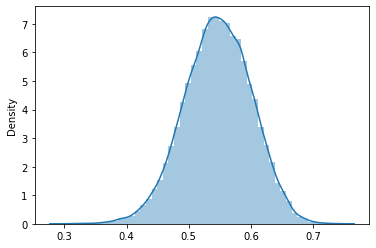

In [ ]:
import seaborn as sns

sns.distplot(diff_norm)

In [ ]:
from numpy.linalg import multi_dot

norm_basis_vectors = np.diag(multi_dot([codebook, codebook.T]))
dot_product = multi_dot([main_vectors, codebook.T])
projection_coeff = dot_product / norm_basis_vectors

projected_vectors = np.zeros_like(main_vectors).astype(float)

for i in range(main_vectors.shape[0]):
    coeff = projection_coeff[i]
    projected_vectors[i] = np.average(codebook.T, weights=coeff, axis=1)*sum(coeff)

diff_vectors = projected_vectors - main_vectors
diff_norm = np.sum(np.abs(diff_vectors)**2,axis=-1)**(1./2)
diff_norm_average = np.average(diff_norm)
diff_norm_average

0.545972692735244

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


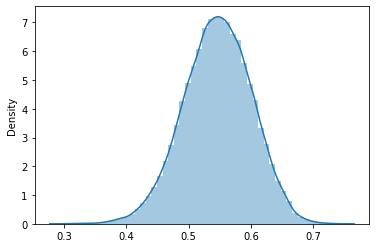

In [ ]:
sns.distplot(diff_norm)

In [ ]:
dot_product = multi_dot([agg_vectors, codebook.T])
projection_coeff = dot_product / norm_basis_vectors

projected_vectors = np.zeros_like(agg_vectors).astype(float)

for i in range(agg_vectors.shape[0]):
    coeff = projection_coeff[i]
    projected_vectors[i] = np.average(codebook.T, weights=coeff, axis=1)*sum(coeff)

diff_vectors = projected_vectors - agg_vectors
diff_norm = np.sum(np.abs(diff_vectors)**2,axis=-1)**(1./2)
diff_norm_average = np.average(diff_norm)
diff_norm_average

0.5481376285856653

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


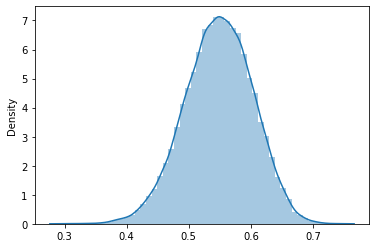

In [ ]:
sns.distplot(diff_norm)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(main_vectors)
main_dr = pca.transform(main_vectors)

In [ ]:
from scipy.cluster.vq import vq, kmeans
codebook1, distortion = kmeans(main_dr, 5)

In [ ]:
craig_dr = pca.transform(craig_vectors)
agg_dr = pca.transform(agg_vectors)

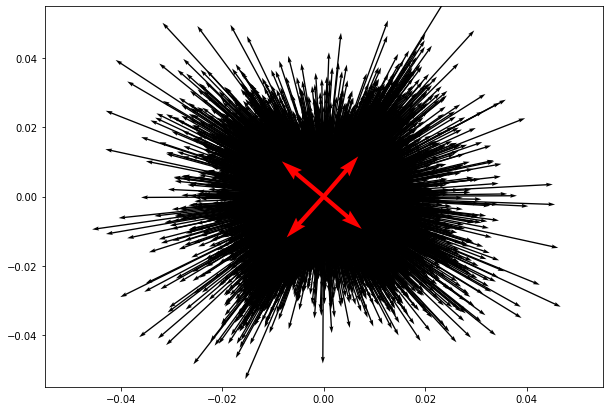

In [ ]:
zeros_v = [0 for _ in range(len(main_dr))]
origin_v = np.array([zeros_v, zeros_v])
plt.quiver(*origin_v, main_dr[:,0], main_dr[:,1], scale=1)

zeros = [0 for _ in range(len(codebook))]
origin = np.array([zeros, zeros])
plt.quiver(*origin, codebook[:,0], codebook[:,1], scale=1, color='red')

plt.rcParams["figure.figsize"] = [10,7]
plt.show()

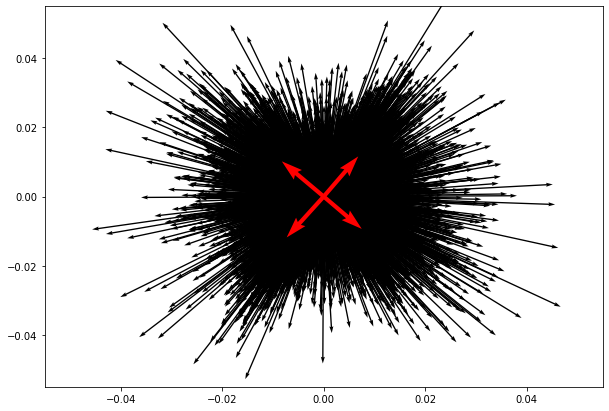

In [ ]:
zeros_v = [0 for _ in range(len(craig_dr))]
origin_v = np.array([zeros_v, zeros_v])
plt.quiver(*origin_v, craig_dr[:,0], craig_dr[:,1], scale=1)

zeros = [0 for _ in range(len(codebook))]
origin = np.array([zeros, zeros])
plt.quiver(*origin, codebook[:,0], codebook[:,1], scale=1, color='red')

plt.rcParams["figure.figsize"] = [10,7]
plt.show()

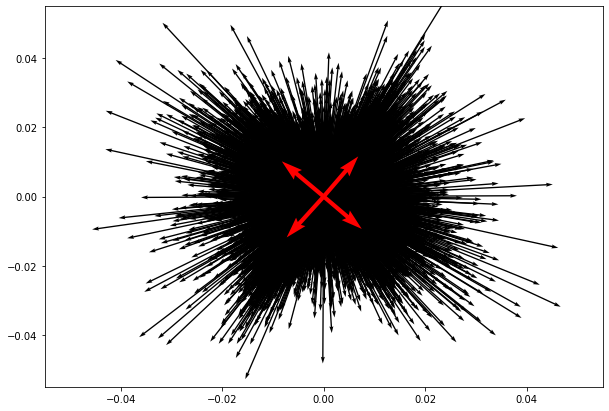

In [ ]:
zeros_v = [0 for _ in range(len(agg_dr))]
origin_v = np.array([zeros_v, zeros_v])
plt.quiver(*origin_v, agg_dr[:,0], agg_dr[:,1], scale=1)

zeros = [0 for _ in range(len(codebook))]
origin = np.array([zeros, zeros])
plt.quiver(*origin, codebook[:,0], codebook[:,1], scale=1, color='red')

plt.rcParams["figure.figsize"] = [10,7]
plt.show()

In [ ]:
indices_rejected = np.array([i for i in range(20000) if i not in indices_craig])
samples_rej = main_vectors[indices_rejected, :]
# rej_dr = pca.transform(samples_rej)

In [ ]:
diff_norm_rejected = diff_norm[indices_rejected]

In [ ]:
np.average(diff_norm_rejected)

0.5494795703303151

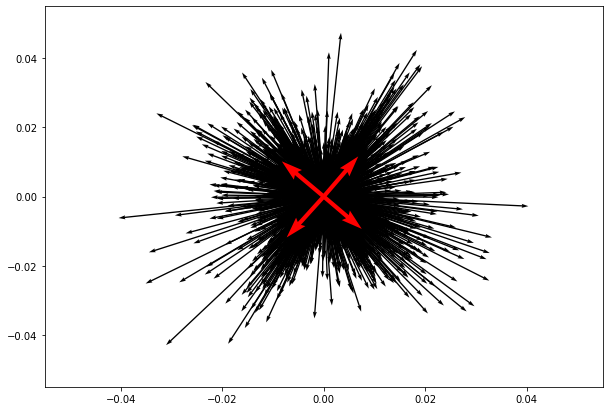

In [ ]:
zeros_v = [0 for _ in range(len(rej_dr))]
origin_v = np.array([zeros_v, zeros_v])
plt.quiver(*origin_v, rej_dr[:,0], rej_dr[:,1], scale=1)

zeros = [0 for _ in range(len(codebook))]
origin = np.array([zeros, zeros])
plt.quiver(*origin, codebook[:,0], codebook[:,1], scale=1, color='red')

plt.rcParams["figure.figsize"] = [10,7]
plt.show()

In [ ]:
indices_rejected = np.array([i for i in range(20000) if i not in indices_agg])
samples_rej = main_vectors[indices_rejected, :]
# rej_dr = pca.transform(samples_rej)

In [ ]:
diff_norm_rejected = diff_norm[indices_rejected]
np.average(diff_norm_rejected)

0.5353263491066447

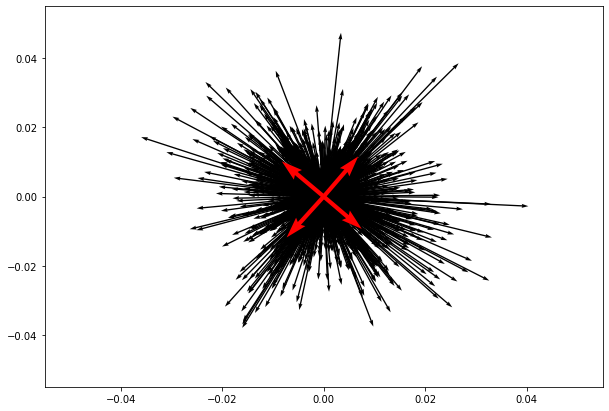

In [ ]:
zeros_v = [0 for _ in range(len(rej_dr))]
origin_v = np.array([zeros_v, zeros_v])
plt.quiver(*origin_v, rej_dr[:,0], rej_dr[:,1], scale=1)

zeros = [0 for _ in range(len(codebook))]
origin = np.array([zeros, zeros])
plt.quiver(*origin, codebook[:,0], codebook[:,1], scale=1, color='red')

plt.rcParams["figure.figsize"] = [10,7]
plt.show()

In [ ]:
indices_id = np.where(diff_norm < 0.5928)[0]

In [ ]:
train_images_id = train_images[indices_id]
train_labels_id = train_labels[indices_id]

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images_id, train_labels_id, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

In [ ]:
train_acc_id_wo_augmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_id_wo_augmeent

79/79 [==============================] - 2s 25ms/step - loss: 1.4634 - accuracy: 0.6818


[1.4633731842041016, 0.6818000078201294]

In [ ]:
num_augmented = 20000
train_images_augment = np.zeros((num_augmented, 32, 32, 3))
train_labels_augment = np.zeros((num_augmented, 1))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
    
datagen.fit(train_images_id)

k = 0
for X_batch, y_batch in datagen.flow(train_images_id, train_labels_id, batch_size=10, seed=499):
  for i in range(0, 10):
      train_images_augment[k] = X_batch[i]
      train_labels_augment[k] = y_batch[i]
      k += 1
      if k >= num_augmented:
          break

  if k >= num_augmented:
          break  

In [ ]:
augmented_dataset = np.append(train_images, train_images_augment, axis=0)
augmented_labels = np.append(train_labels, train_labels_augment, axis=0)

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(augmented_dataset, augmented_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

In [ ]:
train_acc_w_iaugmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_w_iaugmeent

79/79 [==============================] - 2s 24ms/step - loss: 1.3962 - accuracy: 0.7169


[1.396242618560791, 0.7168999910354614]

In [ ]:
id_vectors = main_vectors[indices_id, :]

In [ ]:
from numpy.linalg import multi_dot

norm_basis_vectors = np.diag(multi_dot([codebook, codebook.T]))
dot_product = multi_dot([id_vectors, codebook.T])
projection_coeff = dot_product / norm_basis_vectors

projected_vectors = np.zeros_like(id_vectors).astype(float)

for i in range(id_vectors.shape[0]):
    coeff = projection_coeff[i]
    projected_vectors[i] = np.average(codebook.T, weights=coeff, axis=1)*sum(coeff)

diff_vectors = projected_vectors - id_vectors
diff_norm = np.sum(np.abs(diff_vectors)**2,axis=-1)**(1./2)
diff_norm_average = np.average(diff_norm)
diff_norm_average

0.5302161853689545

In [ ]:
indices_id = np.where(diff_norm < 0.5613)[0]

In [ ]:
train_images_id = train_images[indices_id]
train_labels_id = train_labels[indices_id]

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images_id, train_labels_id, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

In [ ]:
train_acc_w_iaugmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_w_iaugmeent

79/79 [==============================] - 2s 25ms/step - loss: 1.8167 - accuracy: 0.6687


[1.8167355060577393, 0.6686999797821045]

In [ ]:
indices_agg = np.load('indices_agg_60.npy')
indices_craig = np.load('indices_craig_60.npy')

In [ ]:
train_images_craig = train_images[indices_craig]
train_labels_craig = train_labels[indices_craig]

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images_craig, train_labels_craig, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

In [ ]:
train_acc_craig_wo_augmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_craig_wo_augmeent

79/79 [==============================] - 2s 24ms/step - loss: 1.8429 - accuracy: 0.6365


[1.8428936004638672, 0.6365000009536743]

In [ ]:
train_images_agg = train_images[indices_agg]
train_labels_agg = train_labels[indices_agg]

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), dtype='float32'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images_agg, train_labels_agg, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=False)

In [ ]:
train_acc_agg_wo_augmeent = model.evaluate(test_images, test_labels, batch_size=128)
train_acc_agg_wo_augmeent

79/79 [==============================] - 2s 26ms/step - loss: 1.8441 - accuracy: 0.6582


[1.8440607786178589, 0.6582000255584717]

In [ ]:
id_dr = pca.transform(id_vectors)

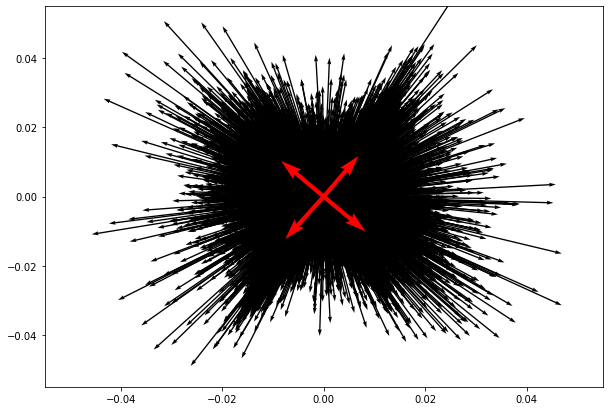

In [ ]:
zeros_v = [0 for _ in range(len(id_dr))]
origin_v = np.array([zeros_v, zeros_v])
plt.quiver(*origin_v, id_dr[:,0], id_dr[:,1], scale=1)

zeros = [0 for _ in range(len(codebook1))]
origin = np.array([zeros, zeros])
plt.quiver(*origin, codebook1[:,0], codebook1[:,1], scale=1, color='red')

plt.rcParams["figure.figsize"] = [10,7]
plt.show()

In [ ]:
indices_rejected = np.array([i for i in range(20000) if i not in indices_id])
samples_rej = main_vectors[indices_rejected, :]
rej_dr = pca.transform(samples_rej)

In [ ]:
diff_norm_rejected = diff_norm[indices_rejected]
np.average(diff_norm_rejected)

0.5824748543380383

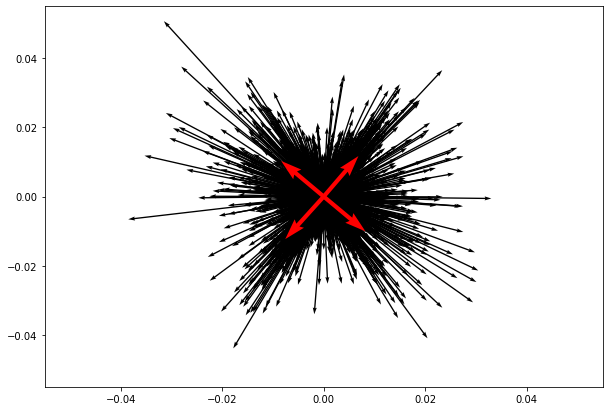

In [ ]:
zeros_v = [0 for _ in range(len(rej_dr))]
origin_v = np.array([zeros_v, zeros_v])
plt.quiver(*origin_v, rej_dr[:,0], rej_dr[:,1], scale=1)

zeros = [0 for _ in range(len(codebook1))]
origin = np.array([zeros, zeros])
plt.quiver(*origin, codebook1[:,0], codebook1[:,1], scale=1, color='red')

plt.rcParams["figure.figsize"] = [10,7]
plt.show()